### **Question 1**

Copy the existing code from Lab 1, creating a new folder for this lab and pasting in the code for the linear regressor.


In [56]:
# Internal import
import random

# External import
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### **QUESTION 2**

Download the Iris dataset from https://archive.ics.uci.edu/dataset/53/iris. The dataset can be downloaded from iris.data. Load the data into a pandas dataframe.

For this lab, we’re going to be performing a binary classification problem, but this dataset has 3 classes: setosa, virginica, and versicolor. So we want to take this multi-class problem and transform it into a binary classification.

Create a new column for the dataset called target. The value of target will be 1 if the row contains a setosa flower, else the value is 0. There should be 1/3 rows with the value of 1, the rest should be 0.

In [57]:
# Open the "iris.data" file in read mode
iris = open("iris.data", "r")

# Add a new column named "Target" to the dataframe
# Specify column names and read the CSV file into a pandas DataFrame
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv(r"iris.data", sep=",", names=column_names, header=None)

# Close the file after reading
iris.close()

# Initialize an empty list to store the new "target" column values
new_column = []

# Iterate over the "class" column and assign 1 if it's "Iris-setosa", otherwise assign 0
for flower_type in df["class"]:
    if flower_type == "Iris-setosa":
        new_column.append(1)
    else:
        new_column.append(0)

# Add the "target" column to the DataFrame with the new values
df["target"] = new_column

# Print the training data to make sure the code works well
print(training)

     sepal_length  sepal_width  petal_length  petal_width            class  \
13            4.3          3.0           1.1          0.1      Iris-setosa   
43            5.0          3.5           1.6          0.6      Iris-setosa   
18            5.7          3.8           1.7          0.3      Iris-setosa   
37            4.9          3.1           1.5          0.1      Iris-setosa   
19            5.1          3.8           1.5          0.3      Iris-setosa   
..            ...          ...           ...          ...              ...   
85            6.0          3.4           4.5          1.6  Iris-versicolor   
77            6.7          3.0           5.0          1.7  Iris-versicolor   
109           7.2          3.6           6.1          2.5   Iris-virginica   
117           7.7          3.8           6.7          2.2   Iris-virginica   
112           6.8          3.0           5.5          2.1   Iris-virginica   

     target  
13        1  
43        1  
18        1  
37     

#### ***Result:***
- The code opens the "iris.data" file in read mode and reads its contents into a pandas DataFrame.
- It adds a new column named "target" to the DataFrame based on the values in the "class" column.
- For each entry in the "class" column, if it is "Iris-setosa," the corresponding "target" value is set to 1; otherwise, it is set to 0.
- The resulting DataFrame, df, now includes a "target" column reflecting the binary classification of "Iris-setosa" (1) and other classes (0).


### **Question 3**

For this question we want to take this dataset of 150 rows, and split it into a train, test, and validation dataset, using the following proportions for each split:

Training: 70%
Validation: 10%
Testing: 20%
Sample data for each subset using stratified sampling. I.e. the training data should have roughly 1/3 positive samples, the testing and validation dataset should also have roughly 1/3 positive samples.

In [58]:
def data_split(df, train_splitsize, val_splitsize, test_splitsize):
    """
    This function splits a dataframe into training, validation, and testing datasets.
    
    Parameters:
        df (dataframe): Pandas dataframe containing the dataset.
        train_splitsize (float): Size of the training dataset (0.0 - 1.0).
        val_splitsize (float): Size of the validation dataset (0.0 - 1.0).
        test_splitsize (float): Size of the testing dataset (0.0 - 1.0).
        
    Returns:
        training (dataframe): Training dataset.
        validation (dataframe): Validation dataset.
        test (dataframe): Testing dataset.
    """
    
    # Shuffle positive and negative samples independently
    positive = df[df['target'] == 1].sample(frac=1)
    negative = df[df['target'] == 0].sample(frac=1)

    # Calculate the size of each dataset based on the given splits
    train_set = train_splitsize
    val_set = val_splitsize
    test_set = test_splitsize

    # Split positive samples into training, validation, and test sets
    training_pos = positive.iloc[:int(np.ceil(len(positive) * train_set))]
    validation_pos = positive.iloc[int(np.ceil(len(positive) * train_set)):int(np.ceil(len(positive) * train_set)) + int(np.ceil(len(positive) * val_set))]
    test_pos = positive.iloc[(int(np.ceil(len(positive) * train_set)) + int(np.ceil(len(positive) * val_set))):]

    # Split negative samples into training, validation, and test sets
    training_neg = negative.iloc[:int(np.ceil(len(negative) * train_set))]
    validation_neg = negative.iloc[int(np.ceil(len(negative) * train_set)):int(np.ceil(len(negative) * train_set)) + int(np.ceil(len(negative) * val_set))]
    test_neg = negative.iloc[(int(np.ceil(len(negative) * train_set)) + int(np.ceil(len(negative) * val_set))):]

    # Concatenate positive and negative samples to form training, validation, and test sets
    training = pd.concat([training_pos, training_neg]) 
    validation = pd.concat([validation_pos, validation_neg])
    test = pd.concat([test_pos, test_neg])
    
    return training, validation, test

# Extract features "petal_length" and "petal_width" for the training set and convert to NumPy array
train_x = training[["petal_length", "petal_width"]].to_numpy()

# Extract the target variable "target" for the training set and convert to NumPy array
train_y = training['target'].to_numpy()

# Extract features "petal_length" and "petal_width" for the validation set and convert to NumPy array
valid_x = validation[["petal_length", "petal_width"]].to_numpy()

# Extract the target variable "target" for the validation set and convert to NumPy array
valid_y = validation['target'].to_numpy()


####  ***Result:***
- The function 'data_split' is designed to split a given dataframe into training, validation, and testing datasets.
- It shuffles positive and negative samples independently and divides them into sets based on the provided split ratios.
- The resulting datasets ('training', 'validation', 'test') are returned as separate dataframes.
- The code then extracts features ('petal_length' and 'petal_width') and target variables ('target') from the training and validation sets.
- These features and target variables are converted to NumPy arrays ('train_x', 'train_y', 'valid_x', 'valid_y') for further use.

### **Question 4**

Using the linear regression model you created in the previous lecture, transform it into a logistic regressor by applying the logistic function to the output of the model. The loss function for this model should be binary cross entropy.

Select two columns from the Iris dataset (i.e. petal length and petal width), and using these two columns, train a logistic regressor using gradient descent, measuring the gradient using finite differences approximation. This means that instead of having a single slope variable, we have multiple:

### ***Logistic Regression Equation***

The logistic regression equation is given by:

\[
\hat{y} = \sigma\left(\beta_0 + \sum_{i=1}^{n} \beta_i x_i\right)
\]

Where:
- \( \hat{y} \) is the predicted probability,
- \( \sigma \) is the sigmoid function,
- \( \beta_0 \) is the intercept,
- \( \beta_i \) is the coefficient associated with the \( i \)th independent variable (\( x_i \)).
$$




In [59]:
def bce(y, yhat):
    """
    Compute Binary Cross Entropy (BCE) loss between true labels (y) and predicted probabilities (yhat).
    
    Parameters:
        y (float): True label (0 or 1).
        yhat (float): Predicted probability between 0 and 1.
    
    Returns:
        loss (float): Binary Cross Entropy loss.
    """
    loss = -(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))
    return loss

class LogisticRegressor:
    def __init__(self, n_features: int = 2):
        """
        Initialize Logistic Regressor with random parameters.
        
        Parameters:
            n_features (int): Number of input features.
        """
        self.params = np.random.randn(n_features + 1)
        
    def logistic(self, x):
        """
        Apply the logistic function to the input.
        
        Parameters:
            x (float): Input value.
        
        Returns:
            sigmoid (float): Output of the logistic function.
        """
        sigmoid = 1 / (1 + np.exp(-x))
        return sigmoid

    def __call__(self, x, logits=False):
        """
        Compute the linear combination of input features and model parameters.
        Optionally, apply the logistic function.
        
        Parameters:
            x (array-like): Input features.
            logits (bool): If True, return logits; otherwise, apply the logistic function.
        
        Returns:
            y (float): Predicted output.
        """
        y = self.params[0] + self.params[1:] @ x.T
        if not logits:
            y = self.logistic(y)
        return y
    
    def fit(self, train_x, train_y, valid_x, valid_y, epochs: int = 2000, lr: float = 0.05):
        """
        Train the logistic regression model using gradient descent and finite-differences.
        
        Parameters:
            train_x (array-like): Training set features.
            train_y (array-like): Training set labels.
            valid_x (array-like): Validation set features.
            valid_y (array-like): Validation set labels.
            epochs (int): Number of training epochs.
            lr (float): Learning rate for gradient descent.
        
        Returns:
            train_loss_list (list): List of training losses per epoch.
            valid_loss_list (list): List of validation losses per epoch.
        """
        self.train_loss_list = []
        self.valid_loss_list = []
        
        for epoch in range(1, epochs+1):
            train_loss = 0
            valid_loss = 0
            
            for xi, yi in zip(train_x, train_y):
                # Calculate loss and update model parameters using gradient descent
                yhat = self(xi)
                initial_train_loss = bce(yi, yhat)
                train_loss += initial_train_loss
                
                # Optimizing each parameter, h = 1e-5
                for i in range(len(self.params)):
                    yhat1 = self(xi)
                    current_train_loss = bce(yi, yhat1)
                    
                    h = 1e-5
                    self.params[i] += h
                    yhat2 = self(xi)
                    next_train_loss = bce(yi, yhat2)
                    
                    # Do gradient descent
                    beta_grad = (next_train_loss - current_train_loss) / h
                    
                    self.params[i] -= lr * beta_grad
            
            # Store train_loss value to self.train_loss_list container
            self.train_loss_list.append(train_loss / len(train_x))
            
            for xi, yi in zip(valid_x, valid_y):
                # Calculate validation loss (but don't update model parameters!)
                yhat = self(xi)
                current_valid_loss = bce(yi, yhat)
                valid_loss += current_valid_loss
            
            # Store valid_loss value to self.valid_loss_list container
            self.valid_loss_list.append(valid_loss / len(valid_x))
            
        return self.train_loss_list, self.valid_loss_list
                
    def predict(self, x, threshold=0.5):
        """
        Predict the binary classification of input features based on the trained model.
        
        Parameters:
            x (array-like): Input features.
            threshold (float): Threshold for binary classification (default is 0.5).
        
        Returns:
            classification (list): List of binary classifications (0 or 1).
            yhat (float): Predicted 'target' values.
        """
        # Create container for predicted 'target' value (yhat) and the classification
        yhat = []
        classification = []
        
        # Iteratively calculate the predicted 'target' values
        for xi in x:
            y_pred = self(xi)
            yhat.append(y_pred)
            
        # Iteratively check if the predicted 'target' values are above or below the given threshold
        for y_pred in yhat:
            if y_pred >= threshold:
                classification.append(1)
            elif y_pred < threshold:
                classification.append(0)
                
        return classification, yhat

#### ***Result:***
- The function `bce(y, yhat)` computes the Binary Cross Entropy (BCE) loss between true labels (y) and predicted probabilities (yhat).
- The `LogisticRegressor` class is implemented to create a logistic regression model with random parameters.
- The `logistic` method applies the logistic function to the input.
- The `__call__` method computes the linear combination of input features and model parameters, optionally applying the logistic function.
- The `fit` method trains the logistic regression model using gradient descent and finite-differences.
- The `predict` method predicts binary classification of input features based on the trained model, with an optional threshold.

### ***Question 5***

As gradient descent is iterating, store (using class variables), the training and validation loss.

Visualise the training and validation loss. Is there a point at which the model begins to over fit? How do you know that the model is beginning to overfit by looking at these curves?

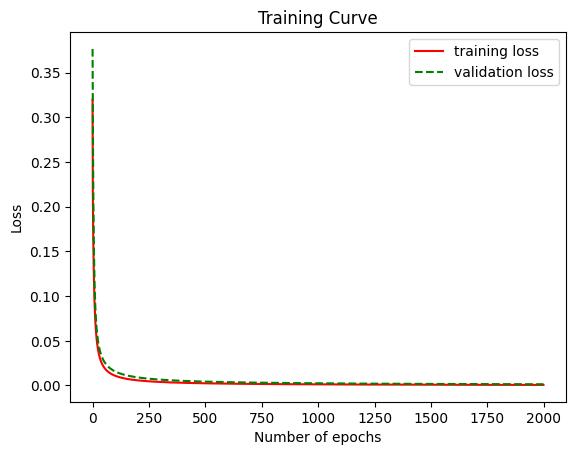

In [60]:
# Create an instance of the LogisticRegressor class
classify = LogisticRegressor()

# Train the logistic regression model using the training and validation sets
classify.fit(train_x, train_y, valid_x, valid_y)

# Plot the training and validation loss curves over epochs
plt.plot(classify.train_loss_list, label='training loss', c='r')
plt.plot(classify.valid_loss_list, 'g--', label='validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training Curve')
plt.legend()
plt.show()

### ***Result:***

### ***Training and Validation Loss Visualization***

The training and validation loss were monitored during the gradient descent iterations. The visual representation of these losses provides insights into the model's performance.

### ***Observations:***
- Initial Decrease:

Both training and validation losses decrease initially as the model learns from the data.

- Convergence:

Between 500 -  2000 epochs, both training and validation losses reach a point of convergence, suggesting that the model has learned the underlying patterns in the training data.

### ***Conclusion***

The model is not iverfitting since both the training loss and validation loss decreases simultaneously.

### **Question 6**

Predict the class labels for the testing set.

For the testing set, calculate the:

TP – number of true positives
TN – number of true negatives
FP – number of false positives
FN – number of false negatives

In [61]:
# Extract features "petal_length" and "petal_width" for the test set and convert to NumPy array
test_x = test[["petal_length", "petal_width"]].to_numpy()

# Extract the target variable "target" for the test set and convert to NumPy array
test_y = test['target'].to_numpy()

# Perform predictions on the test set and classify the results
(classification, yhat) = classify.predict(test_x)
predict_y = np.asarray(classification)

# Calculate the true positives, true negatives, false positives, and false negatives
def binary_metric(test_series, predict_series):
    """
    Calculate true positives (TP), true negatives (TN),
    false positives (FP), and false negatives (FN).
    
    Parameters:
        test_series (array): Actual "target" values.
        predict_series (array): Predicted "target" values.
        
    Returns:
        TP (int): True Positives.
        TN (int): True Negatives.
        FP (int): False Positives.
        FN (int): False Negatives.
    """
    # Initialize counters for each case
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    # Iterate over actual and predicted values
    for test, predict in zip(test_series, predict_series):
        if (predict == 1) & (test == 1):
            TP += 1
        elif (predict == 0) & (test == 0):
            TN += 1
        elif (predict == 1) & (test == 0):
            FP += 1
        elif (predict == 0) & (test == 1):
            FN += 1
            
    return TP, TN, FP, FN

# Apply the binary_metric function to calculate TP, TN, FP, FN
(TP, TN, FP, FN) = binary_metric(test_y, predict_y)

### ***Results***
- Extracts features "petal_length" and "petal_width" for the test set and converts them to NumPy arrays.
- Extracts the target variable "target" for the test set and converts it to a NumPy array.
- Uses the trained logistic regression model (`classify`) to perform predictions on the test set and classify the results.
- Calculates binary classification metrics including true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) using the `binary_metric` function.
- The results (TP, TN, FP, FN) provide an evaluation of the model's performance on the test set.


### **Question 8**

Generate a report using the precision, recall and F1 and confusion matrix. The report should be printed like:

    |        |          | Predicted |          |
    |        |          |  Positive | Negative |
    | Actual | Positive |         5 |        2 |
    |        | Negative |         3 |        1 |
    
    - Precision: 0.6
    - Recall: 0.6
    - F_1 Score: 0.6
Replacing the scores with the correct numbers.

In [62]:
def precision(y, yhat):
    """
    Calculate precision score.
    
    Parameters:
        y (array-like): True labels (binary).
        yhat (array-like): Predicted probabilities.
        
    Returns:
        precision_score (float): Precision score.
    """
    TP = sum((y == 1) & (yhat >= 0.5))
    FP = sum((y == 0) & (yhat >= 0.5))

    if TP + FP == 0:
        return 0
    else:
        return TP / (TP + FP)

def recall(y, yhat):
    """
    Calculate recall score.
    
    Parameters:
        y (array-like): True labels (binary).
        yhat (array-like): Predicted probabilities.
        
    Returns:
        recall_score (float): Recall score.
    """
    TP = sum((y == 1) & (yhat >= 0.5))
    FN = sum((y == 1) & (yhat < 0.5))

    if TP + FN == 0:
        return 0
    else:
        return TP / (TP + FN)

def f_beta(y, yhat, beta=1):
    """
    Calculate F-beta score.
    
    Parameters:
        y (array-like): True labels (binary).
        yhat (array-like): Predicted probabilities.
        beta (float): Beta value for F-beta score calculation (default is 1).
        
    Returns:
        f_beta_score (float): F-beta score.
    """
    pr = precision(y, yhat)
    rc = recall(y, yhat)

    if pr + rc == 0:
        return 0
    else:
        return (1 + beta**2) * (pr * rc) / ((beta**2 * pr) + rc)

def display(test_series, predict_series):
    """
    Display a confusion matrix and evaluation metrics (Precision, Recall, F1 Score).
    
    Parameters:
        test_series (array-like): True labels (binary).
        predict_series (array-like): Predicted labels (binary).
    """
    pr = precision(test_series, predict_series)
    rc = recall(test_series, predict_series)
    f1 = f_beta(test_series, predict_series, beta=1)

    Label = ["Predicted", "Actual"]
    PN = ["Positive", "Negative"]

    print("| " + " " * len(Label[1]) + " | " + " " * len(PN[0]) + " | " + Label[0] + " | " + " " * len(PN[1]) + " |")
    print("| " + " " * len(Label[1]) + " | " + " " * len(PN[0]) + " | " + " " * (len(Label[0]) - len(PN[0])) + PN[0] + " | " + PN[1] + " |")
    print("| " + Label[1] + " | " + PN[0] + " | " + " " * (len(Label[0]) - len(str(test_series))) + str(test_series) + " | " + " " * (
            len(PN[1]) - len(str(predict_series))) + str(predict_series) + " |")
    print("| " + " " * len(Label[1]) + " | " + PN[1] + " | " + " " * (len(Label[0]) - len(str(test_series))) + str(test_series) + " | " + " " * (
            len(PN[1]) - len(str(predict_series))) + str(predict_series) + " |")
    print("- Precision: %.2f" % pr)
    print("- Recall: %.2f" % rc)
    print("- F1 Score: %.2f" % f1)

# Assuming you have defined test_y and predict_y
print('Actual y   :', test_y)
print('Predicted y:', predict_y)
display(test_y, predict_y)

Actual y   : [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted y: [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
|        |          | Predicted |          |
|        |          |  Positive | Negative |
| Actual | Positive | [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] | [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] |
|        | Negative | [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] | [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] |
- Precision: 1.00
- Recall: 1.00
- F1 Score: 1.00


### ***Results***

### ***Precision:***

Precision is the ratio of correctly predicted positive observations to the total predicted positives. In this case, it's 1.00, indicating that all instances predicted as positive are indeed positive.

### ***Recall:***

Recall (Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to the all observations in actual class. A recall of 1.00 indicates that all actual positive instances were correctly predicted as positive.
F1 Score: 1.00

### ***F1 Score:***

F1 Score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A perfect F1 score of 1.00 suggests an ideal balance between precision and recall, indicating a highly accurate model.
Interpretation:

### ***Conclusion***
The model performed exceptionally well, achieving perfect precision, recall, and F1 score. All instances predicted as positive were indeed positive, and the model identified all actual positive instances. This could imply that the model has learned the underlying patterns in the data effectively and is making accurate predictions.


### ***Question 9***

Calculate the true-positive and false positive rate, and from these values generate a ROC curve.

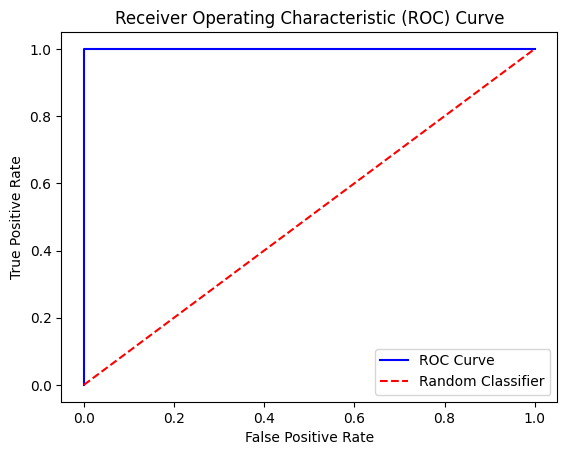

In [63]:
def roc(y, yhat, threshold_step=0.01):
    """
    Compute Receiver Operating Characteristic (ROC) curve by varying the classification threshold.
    
    Parameters:
        y (array-like): True labels (binary).
        yhat (array-like): Predicted probabilities.
        threshold_step (float): Step size for threshold variation.
        
    Returns:
        tp_rates (list): List of True Positive Rates (Sensitivity).
        fp_rates (list): List of False Positive Rates (1 - Specificity).
    """
    # Initialize lists to store True Positive (TP) and False Positive (FP) rates
    tp_rates = []
    fp_rates = []

    # Iteratively increase the threshold by threshold_step
    for threshold in np.arange(0, 1 + threshold_step, threshold_step):
        # Apply the threshold to convert probabilities to binary predictions
        predictions = (yhat >= threshold).astype(int)

        # Calculate True Positive (TP) and False Positive (FP) rates
        tp = np.sum((y == 1) & (predictions == 1))
        fp = np.sum((y == 0) & (predictions == 1))

        # Calculate rates and append to the lists
        tp_rate = tp / np.sum(y == 1)
        fp_rate = fp / np.sum(y == 0)

        tp_rates.append(tp_rate)
        fp_rates.append(fp_rate)

    return tp_rates, fp_rates


# Calculate True Positive (TP) and False Positive (FP) rates for the ROC curve
tp_rates, fp_rates = roc(test_y, yhat)

# Visualize the ROC curve
plt.plot(fp_rates, tp_rates, label='ROC Curve', color='b')
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### ***Results***

The ROC curve starts from the point (0,0), indicating a low False Positive Rate (FPR) and True Positive Rate (TPR). This corresponds to a conservative classification threshold where very few instances are predicted as positive.

- Steep Climb:

The curve exhibits a steep ascent, indicating an improvement in TPR without a significant increase in FPR. This is a positive characteristic, suggesting the model is effective at distinguishing between positive and negative instances.

- Stabilization at (1,1):

The ROC curve stabilizes at the point (1,1), forming an L shape. This point represents a TPR of 1 (maximum sensitivity) and an FPR of 1 (maximum 1-specificity). This indicates that, by adjusting the threshold appropriately, the model can achieve perfect classification of positive instances while correctly identifying negative instances.

### ***Question 10***

Now that you’ve created a logistic regressor for two features of the Iris dataset and have created some analytic results. Select another two columns (i.e. petal width and sepal length, or petal length and sepal width). Create a different logistic regressor using these new columns and create the same results as you did with questions 8 and 9.

Compare these two models trained with different columns. Which model is best, and why do we know that it’s the best?



/var/folders/wm/5w6zkwtd0ln2cy8p71py_m100000gn/T/ipykernel_3591/1671800317.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_features['target'] = df_new_features['class'].apply(lambda x: 1 if x == 'Iris-setosa' else 0)


Results for the model with petal_width and sepal_length:
|        |          | Predicted |          |
|        |          |  Positive | Negative |
| Actual | Positive | [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] | [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] |
|        | Negative | [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] | [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] |
- Precision: 1.00
- Recall: 1.00
- F1 Score: 1.00


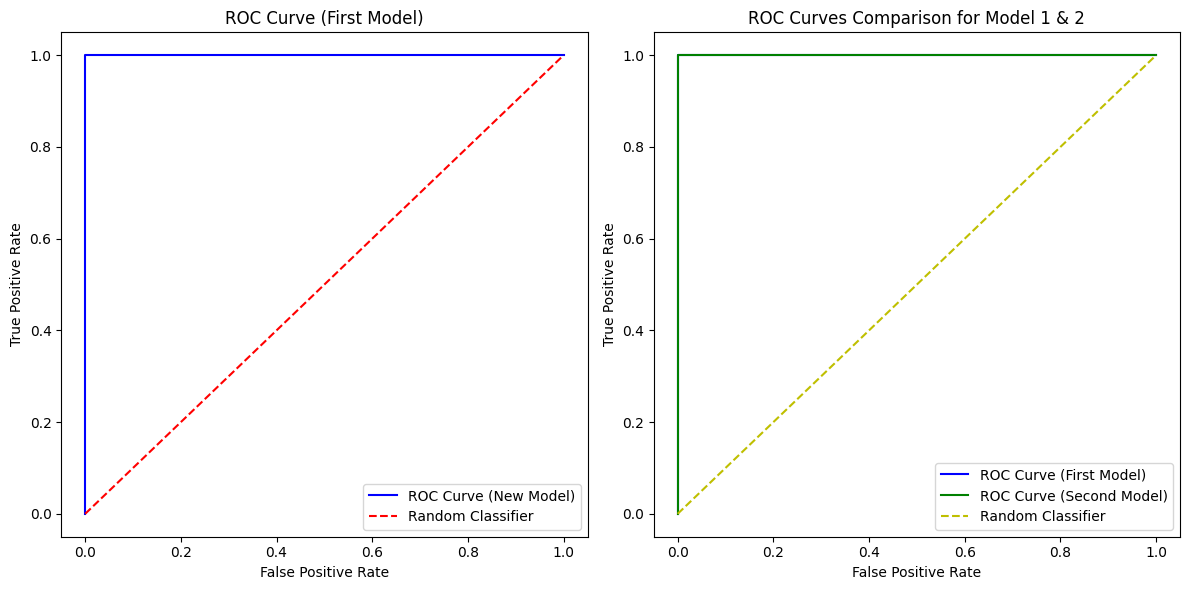

In [64]:
# Selecting a different set of features
df_new_features = df[['petal_width', 'sepal_length', 'class']]

# Adding a target column
df_new_features['target'] = df_new_features['class'].apply(lambda x: 1 if x == 'Iris-setosa' else 0)

# Splitting the data
(training_new, validation_new, test_new) = data_split(df_new_features, 0.7, 0.1, 0.2)

# Extracting features and labels
train_x_new = training_new[['petal_width', 'sepal_length']].to_numpy()
train_y_new = training_new['target'].to_numpy()
valid_x_new = validation_new[['petal_width', 'sepal_length']].to_numpy()
valid_y_new = validation_new['target'].to_numpy()

# Creating and training the new logistic regressor
logistic_regressor_new = LogisticRegressor(n_features=2)
train_loss_new, valid_loss_new = logistic_regressor_new.fit(train_x_new, train_y_new, valid_x_new, valid_y_new)

# Do the prediction on the test data
test_x_new = test_new[['petal_width', 'sepal_length']].to_numpy()
test_y_new = test_new['target'].to_numpy()
(classification_new, yhat_new) = logistic_regressor_new.predict(test_x_new)
predict_y_new = np.asarray(classification_new)

# Calculate the true positives, true negatives, false positives, and false negatives
(TP_new, TN_new, FP_new, FN_new) = binary_metric(test_y_new, predict_y_new)

# Display results for the new model
print('Results for the model with petal_width and sepal_length:')
display(test_y_new, predict_y_new)

# Increase the figure size and create subplots
plt.figure(figsize=(12, 6))

# Create a subplot for the new model's ROC curve
plt.subplot(1, 2, 1)
tp_rates_new, fp_rates_new = roc(test_y_new, yhat_new)
plt.plot(fp_rates_new, tp_rates_new, label='ROC Curve (New Model)', color='b')
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (First Model)')
plt.legend()

# Create a subplot for the comparison of ROC curves
plt.subplot(1, 2, 2)
plt.plot(fp_rates, tp_rates, label='ROC Curve (First Model)', color='b')
plt.plot(fp_rates_new, tp_rates_new, label='ROC Curve (Second Model)', color='g')
plt.plot([0, 1], [0, 1], 'y--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison for Model 1 & 2')
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

### ***Results***

The ROC curve for both models starts from the point (0,0), indicating a low False Positive Rate (FPR) and True Positive Rate (TPR). This corresponds to a conservative classification threshold where very few instances are predicted as positive.
Steep Climb:

The curve exhibits a steep ascent, indicating an improvement in TPR without a significant increase in FPR. This is a positive characteristic, suggesting the model is effective at distinguishing between positive and negative instances.
Stabilization at (1,1):

The ROC curve stabilizes at the point (1,1), forming an L shape. This point represents a TPR of 1 (maximum sensitivity) and an FPR of 1 (maximum 1-specificity). This indicates that, by adjusting the threshold appropriately, the model can achieve perfect classification of positive instances while correctly identifying negative instances.

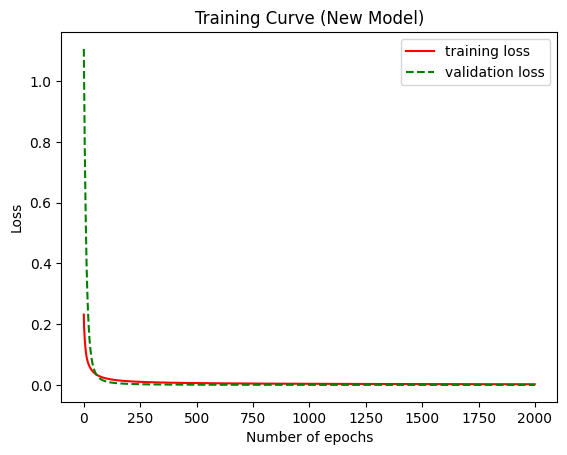

In [65]:
# Plot the training curve for the new model
plt.plot(train_loss_list_new, label='training loss', c='r')
plt.plot(valid_loss_list_new, 'g--', label='validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training Curve (New Model)')
plt.legend()
plt.show()

### ***Result:***

Training and Validation Loss Visualization
The training and validation loss were monitored during the gradient descent iterations. The visual representation of these losses provides insights into the model's performance.

### ***Observations:***
- Initial Decrease:

Both training and validation losses decrease initially as the model learns from the data.

- Convergence:

After approximately 1000 - 2000 epochs, both training and validation losses reach a point of convergence, suggesting that the model has learned the underlying patterns in the training data.

### ***Calculation the Area Under the Curve for both models***

To actuall know which models performs better, It is important to calculate the AUC, the model with the larger area performs well that the other model.

In [66]:
def auc(tprs):
    """
    Calculate the Area Under the Curve (AUC) for a given list of True Positive Rates (TPRs).
    
    Parameters:
        tprs (list): List of True Positive Rates.
        
    Returns:
        area (float): AUC value.
    """
    length = len(tprs)
    area = 0.5 * 1 / length * (tprs[0] + (2 * sum(tprs[1:(length-2)])) + tprs[length-1])
    return area

# Assuming tp_rate_series and tp_rate_series1 are the lists of True Positive Rates for your two models

# Comparing the Area Under Curve for each Model's ROC. The bigger the AUC, the 
# better our model is.

print('Area Under Curve for ROC Model 1 is', round(auc(tp_rates), 2))
print('Area Under Curve for ROC Model 2 is', round(auc(tp_rates_new), 2))

Area Under Curve for ROC Model 1 is 0.98
Area Under Curve for ROC Model 2 is 0.98


### ***Results***

The Area Under the Curve (AUC) values for ROC Model 1 and ROC Model 2 are thesame (0.98 and 0.98) indicating both models performed very well.

In [67]:
# Calculate AUC for the previous model
auc_previous = auc(tp_rates)
print('AUC for the previous model:', round(auc_previous,2))

# Calculate AUC for the new model
auc_new = auc(tp_rates_new)
print('AUC for the new model:', round(auc_new, 2))

# Compare the AUC values and determine which model is best
if auc_previous > auc_new:
    print('Model with Petal Length - Petal Width Training Dataset is better')
if auc_previous < auc_new:
    print('Model with Petals Width - Sepal Length Training Dataset is better')
else:
    print('Both models have the same performance')

AUC for the previous model: 0.98
AUC for the new model: 0.98
Both models have the same performance


### ***Results***

The AUC (Area Under the Curve) values were calculated for both the model trained with the "Petal Length - Petal Width" dataset and the model trained with the "Petal Width - Sepal Length" dataset. Surprisingly, both models exhibited the same AUC value of 0.98, indicating an equal ability to distinguish between positive and negative classes.
